In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import yfinance as yf
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [2]:
# top 40 dax companies 
dax_assets = {
               'DAX': '^GDAXI',
               'Linde': 'LIN',
               'SAP': 'SAP',
               'Deutsche Telekom': 'DTE.DE',
               'Volkswagen': 'VOW3.DE',
               'Siemens': 'SIE.DE',
               'Merck': 'MRK.DE',
               'Airbus': 'AIR.PA',
               'Mercedes Benz': 'MBG.DE', 
               'Bayer': 'BAYZF',
               'BMW': 'BMW.DE',
               'Siemens Healthineers': 'SHL.DE',
               'Deutsche Post': 'DPW.DE',
               'BASF': 'BAS.DE',
               'Münchner Rück': 'MUV2.DE',
               'Infineon': 'IFX.DE',
               'Deutsche Börse': 'DB1:DE',
               'RWE': 'RWE.DE',
               'Henkel': 'HEN3.DE',
               'Adidas': 'ADS.DE',
               'Sartorius': 'SRT.DE',
               'Beiersdorf': 'BEI.DE',
               'Porsche': 'PAH3.DE',
               'E.ON': 'EOAN.DE',
               'Deutsche Bank': 'DB',
               'Vonovia': 'VNA.DE',
               'Fresenius': 'FRE.DE',
               'Symrise': 'SY1.DE',
               'Continental': 'CON.DE',
               'Delivery Hero': 'DHER.F',
               'Brenntag': 'BNR.DE',
               'Qiagen': 'QGEN',
               'Fresenius Medical Care': 'FMS',
               'Siemens Energy': 'ENR.F',
               'HeidelbergCement': 'HEI.DE',
               'Puma': 'PUM.DE',
               'MTU Aero Engines': 'MTX.DE',
               'Covestro': '1COV.F',
               'Zalando': 'ZAL.DE',
               'HelloFresh': 'HFG.DE'
            }

dax_assets = {
               'Microsoft': 'MSFT',
               'Tesla': 'TSLA',
               'Google': 'GOOG',
               'Apple': 'AAPL',
               'IBM': 'IBM',
               'Amazon': 'AMZN',
               'Samsung': 'SSUN.F',
               'Intel': 'INTC',
                }

In [3]:
# utils
def find_stock_name(stock_ticker:str)->str:
    """return stock or asset name given the stock/asset ticker name"""
    for key, val in dax_assets.items():
        if val == stock_ticker:
            return key

In [4]:
dax_top_40_companies = list(dax_assets.keys())#[1:]
dax_top_40_tickername = list(dax_assets.values())#[1:]

In [5]:
start_date = datetime(2019,1,1)
str(start_date.year)+'-'+str(start_date.month)+'-'+str(start_date.day)

'2019-1-1'

In [6]:
start_date = '2010-1-1'
end_date = '2022-9-15'
na_percentage = 0.6 # at least x percent rows must be none-nas

In [7]:
# download DAX top40
df = yf.download(dax_top_40_tickername, 
                start=start_date, 
                end=end_date,
                progress=True)
# drop columns
df = df['Close']
# get actual stock names
stock_names = [find_stock_name(stock_ticker) for stock_ticker in df.columns]
# rename columns
df.columns = stock_names
# make sure the index is datetime format
df.index = pd.to_datetime(df.index)
# drop nas
datetimeFormat = '%Y-%m-%d'
time_delta = datetime.strptime(end_date, datetimeFormat) - datetime.strptime(start_date,datetimeFormat)
df.dropna(axis=1, thresh=int(time_delta.days * na_percentage), inplace=True)
# show data
df.head()

[*********************100%***********************]  40 of 40 completed

1 Failed download:
- DB1:DE: No data found, symbol may be delisted


,Adidas,Airbus,BASF,Bayer,Beiersdorf,BMW,Brenntag,Continental,Deutsche Bank,Deutsche Post,...,Porsche,Puma,Qiagen,RWE,SAP,Siemens,Sartorius,Symrise,Volkswagen,DAX
Date,,,,,,,,,,,,,,,,,,,,,
2009-12-31,NaN,NaN,NaN,80.400002,NaN,NaN,NaN,NaN,67.662216,NaN,...,NaN,NaN,23.212057,NaN,46.810001,NaN,NaN,NaN,NaN,NaN
2010-01-04,38.505001,13.990,44.849998,80.400002,46.445000,32.049999,NaN,36.867805,69.875954,13.980,...,37.068539,24.090000,23.555094,68.731125,47.110001,63.442383,3.8500,15.515,64.114349,6048.299805
2010-01-05,39.720001,13.945,44.169998,80.400002,46.200001,32.310001,NaN,39.174160,71.211830,14.000,...,38.269535,24.010000,23.264032,68.292587,46.820000,63.481140,3.9675,15.520,62.871826,6031.859863
2010-01-06,39.400002,14.070,44.450001,78.949997,46.165001,32.810001,NaN,39.430424,69.980919,14.155,...,39.021763,23.625000,23.513514,68.163017,47.910000,63.713711,3.9675,16.020,64.611359,6034.330078
2010-01-07,39.744999,14.210,44.154999,78.949997,45.700001,33.099998,NaN,44.483124,70.772903,14.125,...,41.274170,23.504999,23.617464,67.873978,49.169998,64.469551,3.9550,15.910,65.356880,6019.359863


In [8]:
# check if any NAs 
df.isna().sum()

Adidas                     60
Airbus                     34
BASF                       60
Bayer                      88
Beiersdorf                 60
BMW                        60
Brenntag                  120
Continental                60
Deutsche Bank              88
Deutsche Post              60
Deutsche Telekom           60
E.ON                       60
Fresenius Medical Care     88
Fresenius                  60
HeidelbergCement           60
Henkel                     60
Infineon                   60
Linde                      88
Mercedes Benz              60
Merck                      60
MTU Aero Engines           60
Münchner Rück              60
Porsche                    60
Puma                       60
Qiagen                     88
RWE                        60
SAP                        88
Siemens                    60
Sartorius                  60
Symrise                    60
Volkswagen                 60
DAX                        65
dtype: int64

In [9]:
df = df.interpolate(method='time', limit=7).fillna(value=None, method='bfill', axis=0, inplace=False, limit=7, downcast=None)

In [10]:
# check if any NAs left
df.isna().sum()

Adidas                     0
Airbus                     0
BASF                       0
Bayer                      0
Beiersdorf                 0
BMW                        0
Brenntag                  55
Continental                0
Deutsche Bank              0
Deutsche Post              0
Deutsche Telekom           0
E.ON                       0
Fresenius Medical Care     0
Fresenius                  0
HeidelbergCement           0
Henkel                     0
Infineon                   0
Linde                      0
Mercedes Benz              0
Merck                      0
MTU Aero Engines           0
Münchner Rück              0
Porsche                    0
Puma                       0
Qiagen                     0
RWE                        0
SAP                        0
Siemens                    0
Sartorius                  0
Symrise                    0
Volkswagen                 0
DAX                        0
dtype: int64

In [11]:
df.head()

,Adidas,Airbus,BASF,Bayer,Beiersdorf,BMW,Brenntag,Continental,Deutsche Bank,Deutsche Post,...,Porsche,Puma,Qiagen,RWE,SAP,Siemens,Sartorius,Symrise,Volkswagen,DAX
Date,,,,,,,,,,,,,,,,,,,,,
2009-12-31,38.505001,13.990,44.849998,80.400002,46.445000,32.049999,NaN,36.867805,67.662216,13.980,...,37.068539,24.090000,23.212057,68.731125,46.810001,63.442383,3.8500,15.515,64.114349,6048.299805
2010-01-04,38.505001,13.990,44.849998,80.400002,46.445000,32.049999,NaN,36.867805,69.875954,13.980,...,37.068539,24.090000,23.555094,68.731125,47.110001,63.442383,3.8500,15.515,64.114349,6048.299805
2010-01-05,39.720001,13.945,44.169998,80.400002,46.200001,32.310001,NaN,39.174160,71.211830,14.000,...,38.269535,24.010000,23.264032,68.292587,46.820000,63.481140,3.9675,15.520,62.871826,6031.859863
2010-01-06,39.400002,14.070,44.450001,78.949997,46.165001,32.810001,NaN,39.430424,69.980919,14.155,...,39.021763,23.625000,23.513514,68.163017,47.910000,63.713711,3.9675,16.020,64.611359,6034.330078
2010-01-07,39.744999,14.210,44.154999,78.949997,45.700001,33.099998,NaN,44.483124,70.772903,14.125,...,41.274170,23.504999,23.617464,67.873978,49.169998,64.469551,3.9550,15.910,65.356880,6019.359863


In [12]:
# plot daily portfolio worth
fig = px.line(df,
              y="Linde", 
              title='Linde')
fig.show()

# Predict Single Stock Price using FB Neural Prophet

In [13]:
from neuralprophet import NeuralProphet

In [14]:
df_stock = df[['Linde']].copy()
df_stock = df_stock.rename(columns={'Linde':'y', 'Date':'ds'})
df_stock['ds'] = df_stock.index
df_stock = df_stock.reset_index()
df_stock = df_stock[['ds','y']]
df_stock

,ds,y
0,2009-12-31,80.309998
1,2010-01-04,81.559998
2,2010-01-05,80.040001
3,2010-01-06,80.750000
4,2010-01-07,80.959999
...,...,...
3281,2022-09-08,283.910004
3282,2022-09-09,287.029999
3283,2022-09-12,294.510010
3284,2022-09-13,285.579987


In [15]:
METRICS = ['MAE', 'RMSE']
params = {"n_forecasts": 180, "n_lags": 30}

In [16]:
# instantiate model object
m = NeuralProphet(**params)

In [17]:
# set up cross validation
folds = m.crossvalidation_split_df(df_stock, freq="D", k=3, fold_pct=0.20, fold_overlap_pct=0.5)

metrics_train = pd.DataFrame(columns=METRICS)
metrics_test = pd.DataFrame(columns=METRICS)

for df_train, df_test in folds:
    m = NeuralProphet(**params)
    train = m.fit(df=df_train, freq="D")
    test = m.test(df=df_test)
    metrics_train = metrics_train.append(train[METRICS].iloc[-1])
    metrics_test = metrics_test.append(test[METRICS].iloc[-1])

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 99.026% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.forecaster.__handle_missing_data) - 1355 missing dates added.
INFO - (NP.forecaster.__handle_missing_data) - 1355 NaN values in column y were auto-imputed.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.964% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 147
 96%|█████████▌| 129/135 [00:02<00:00, 60.85it/s]
INFO - (NP.utils_torch.lr_range

In [18]:
metrics_test.describe().loc[["mean", "std", "min", "max"]]

,MAE,RMSE
mean,29.494182,34.190606
std,18.463166,19.674562
min,14.607165,19.125257
max,50.154007,56.449612


In [17]:
# make a two fold validation
m = NeuralProphet(**params)
df_train, df_val = m.split_df(df_stock, freq='D', valid_p=0.25)
#metrics = m.fit(df_train, validation_df=df_val, progress="plot-all")
metrics = m.fit(df_train, validation_df=df_val)

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 99.026% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.forecaster.__handle_missing_data) - 1355 missing dates added.
INFO - (NP.forecaster.__handle_missing_data) - 1355 NaN values in column y were auto-imputed.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.971% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 139


  0%|          | 0/137 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.72E-02, min: 2.62E-01


  0%|          | 0/137 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.72E-02, min: 3.56E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 6.89E-02
Epoch[139/139]: 100%|██████████| 139/139 [01:34<00:00,  1.47it/s, SmoothL1Loss=0.00125, MAE=3.3, RMSE=4.35, RegLoss=0, MAE_val=47.8, RMSE_val=55.9, SmoothL1Loss_val=0.204] 


In [18]:
metrics

,SmoothL1Loss,MAE,RMSE,RegLoss,SmoothL1Loss_val,MAE_val,RMSE_val
0,0.458051,72.745402,91.596283,0.0,0.738953,100.356648,126.929044
1,0.280873,54.429997,67.759685,0.0,0.483387,76.111794,93.333458
2,0.155617,39.512494,48.803137,0.0,0.336207,61.522870,74.240233
3,0.059775,24.174530,29.746265,0.0,0.179850,43.977509,52.560851
4,0.015032,11.968551,14.776370,0.0,0.106147,33.664789,40.246186
...,...,...,...,...,...,...,...
134,0.001259,3.322182,4.370569,0.0,0.205155,47.942444,56.037474
135,0.001256,3.311326,4.366551,0.0,0.204875,47.925166,55.995879
136,0.001251,3.308701,4.358499,0.0,0.206422,48.112373,56.212598
137,0.001250,3.305882,4.355490,0.0,0.203982,47.799959,55.871703


In [21]:
#m.plot(metrics)

In [19]:
# train model on all data
m = NeuralProphet(**params)

# fit model
metrics = m.fit(df_stock)

# Predictions
future = m.make_future_dataframe(df=df_stock, periods=365, n_historic_predictions=len(df_stock)) #we need to specify the number of days in future
forecast = m.predict(future)

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 99.026% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as B
INFO - (NP.forecaster.__handle_missing_data) - 29 missing dates added.
INFO - (NP.forecaster.__handle_missing_data) - 30 NaN values in column y were auto-imputed.
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 140


  0%|          | 0/137 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.66E-02, min: 2.25E-01


  0%|          | 0/137 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 6.66E-02, min: 1.94E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 7.63E-02
Epoch[140/140]: 100%|██████████| 140/140 [01:25<00:00,  1.64it/s, SmoothL1Loss=0.000838, MAE=6.47, RMSE=9.52, RegLoss=0]
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 99.026% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
WARNING - (NP.forecaster._make_future_dataframe) - Insufficient data for 3286 historic forecasts, reduced to 3256.
WARNING - (NP.forecaster._make_future_dataframe) - Number of forecast steps is defined by n_forecasts. Adjusted to 180.
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 99.077% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - B
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 99.077% of the dat

In [20]:
forecast.head()

,ds,y,yhat1,residual1,yhat2,residual2,yhat3,residual3,yhat4,residual4,...,ar174,ar175,ar176,ar177,ar178,ar179,ar180,trend,season_yearly,season_weekly
0,2009-12-31,80.309998,None,NaN,None,NaN,None,NaN,None,NaN,...,None,None,None,None,None,None,None,None,None,None
1,2010-01-01,80.934998,None,NaN,None,NaN,None,NaN,None,NaN,...,None,None,None,None,None,None,None,None,None,None
2,2010-01-04,81.559998,None,NaN,None,NaN,None,NaN,None,NaN,...,None,None,None,None,None,None,None,None,None,None
3,2010-01-05,80.040001,None,NaN,None,NaN,None,NaN,None,NaN,...,None,None,None,None,None,None,None,None,None,None
4,2010-01-06,80.750000,None,NaN,None,NaN,None,NaN,None,NaN,...,None,None,None,None,None,None,None,None,None,None


In [21]:
# plot the data
fig = go.Figure()
fig = fig.add_trace(go.Line(x = forecast['ds'],
                            y = forecast['y'], 
                            name = 'price'))

fig = fig.add_trace(go.Line(x = forecast['ds'],
                            y = forecast['yhat180'], 
                            name = 'forecast'))

fig = fig.add_trace(go.Line(x = forecast['ds'],
                            y = forecast['trend'], 
                            name = 'trend', 
                            line=dict(color='black', width=4)))       
fig.show()

WARNING - (py.warnings._showwarnmsg) - c:\Users\Sebas\anaconda3\envs\stock_app_new\lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.





WARNING - (NP.plotting.plot) - Legend is available only for the ten first handles


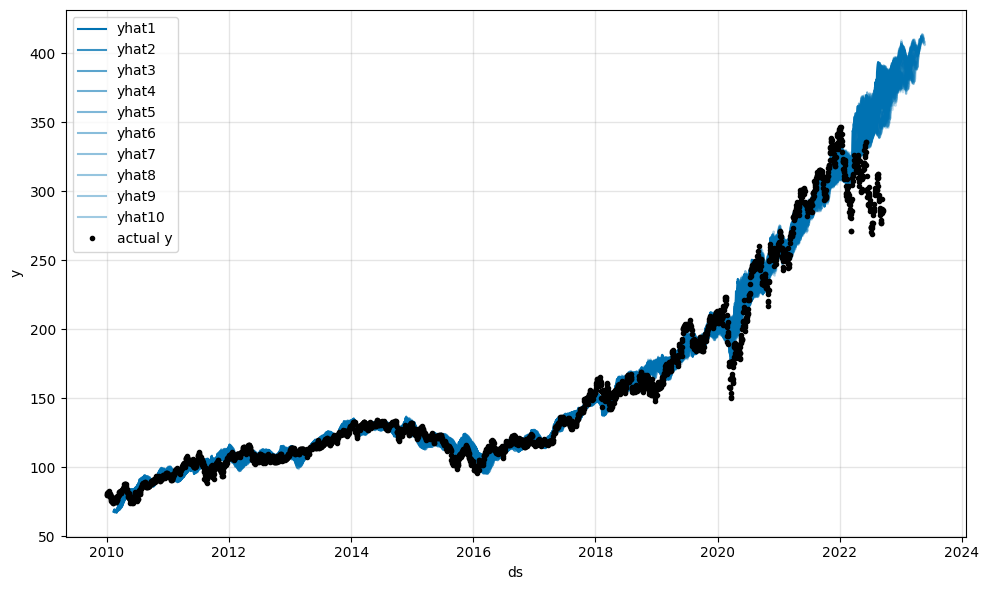

In [22]:
# plot forecast
fig_forecast = m.plot(forecast)

# Portfolio Optimization using Monte-Carlo Simulation

In [13]:
#m.plot_components(forecast)
#plt.show()

In [14]:
# normalized daily returns
def normalized_returns(df):
    return np.log(1 + df.pct_change(periods=1).fillna(value=None, method='bfill', axis=0, inplace=False, limit=7, downcast=None)) 

# create weights
def weight_creator(df):
    rand = np.random.random(len(df.columns))
    rand /= rand.sum()
    return rand

# calculate portfolio return
def portfolio_returns(df, weights):
    return np.dot(df.mean(), weights)

# calculate portfolios standard deviation
def portfolio_std(df, weights):
    return (np.dot(np.dot(df.cov(), weights), weights))**(1/2)*np.sqrt(250)

def portfolio_sharp_ratio(portfolio_return:float, portfolio_std:float, rfr:float)->float:
    """Calculate the sharp ratio for a given portfolio df and a given risk-free-return "rfr"."""
    ntd = 250 #  number of trading days
    return np.divide(portfolio_return - rfr/ntd, portfolio_std) 

In [15]:
# plot daily portfolio worth
fig = px.line(normalized_returns(df), 
              y="Linde", 
              title='Linde: Normalized Returns')
fig.show()

In [16]:
# testing the functions
df_returns = normalized_returns(df)
weights = weight_creator(df_returns)
sdev = portfolio_std(df_returns, weights)
returns = portfolio_returns(df_returns, weights)

print('portfolio return: {:.5f}'.format(returns))
print('portfolio standard deviation: {:.2f}'.format(sdev))

portfolio return: 0.00026
portfolio standard deviation: 0.19


In [17]:

def sim2weights_df(weights:list, stock_names:list)->pd.DataFrame:
    """Make dataframe given the portfolios´s weights from the simulations.  
    """
    # initialize weights dataframe with the weights from first simulation
    df_weights = pd.DataFrame(weights[0]).T
    for weights in weights[1:]:
        df_weights = df_weights.append(pd.DataFrame(weights).T, ignore_index=True) 
    # rename columns
    df_weights.columns = stock_names
    return df_weights

def sim2kpi_df(sim_returns:list, sim_standard_deviations:list, sim_sharp_ratios:list)->pd.DataFrame:
    """Generate key performance indicator dataframe from simulation returns, simulation standard deviations and simulation sharp ratios."""
    return pd.DataFrame(data={'portfolio return': sim_returns, 
                               'portfolio standard dev': sim_standard_deviations, 
                               'portfolio sharp ratio': sim_sharp_ratios})

def sim2_df(sim_returns:list, sim_standard_deviations:list, sim_sharp_ratios:list, weights:list, stock_names:list)->pd.DataFrame:
    """Save monte-carlo simulation results in dataframe"""
    sim_weights_df = sim2weights_df(weights, stock_names)
    sim_kpi_df = sim2kpi_df(sim_returns, sim_standard_deviations, sim_sharp_ratios) 
    return sim_weights_df.join(sim_kpi_df)

In [18]:
# Monte-Carlo Simulation
w = []
returns = []
stds = []
srs = []

# caclulate normalized daily returns 
df_returns = normalized_returns(df)

for n in range(1000):
    weights = weight_creator(df_returns)
    portfolio_return = portfolio_returns(df_returns, weights)
    portfolio_stdev = portfolio_std(df_returns, weights) 
    portfolio_sr = portfolio_sharp_ratio(portfolio_return, portfolio_stdev, rfr=0.02)
    w.append(weights)
    returns.append(portfolio_return)
    stds.append(portfolio_stdev)
    srs.append(portfolio_sr)

In [19]:
# save simulation results in dataframe
stock_names = list(df.columns)
df_simulation = sim2_df(returns, stds, srs, w, stock_names)
df_simulation.head()

,Adidas,Airbus,BASF,Bayer,Beiersdorf,BMW,Brenntag,Continental,Deutsche Bank,Deutsche Post,...,RWE,SAP,Siemens,Sartorius,Symrise,Volkswagen,DAX,portfolio return,portfolio standard dev,portfolio sharp ratio
0,0.012467,0.028381,0.033684,0.018223,0.044949,0.010313,0.044101,0.056877,0.026620,0.028781,...,0.059643,0.024659,0.045255,0.040281,0.025616,0.011905,0.013640,0.000234,0.192380,0.000802
1,0.019334,0.035717,0.010063,0.046608,0.018246,0.028086,0.040580,0.049050,0.042554,0.038415,...,0.008447,0.016376,0.037041,0.005348,0.046562,0.006744,0.037547,0.000201,0.187489,0.000647
2,0.047724,0.048409,0.011048,0.022644,0.036170,0.011002,0.063591,0.003253,0.049079,0.061676,...,0.050841,0.054304,0.004667,0.058299,0.015395,0.026889,0.018364,0.000264,0.184919,0.000994
3,0.021324,0.054792,0.029111,0.014413,0.006509,0.039739,0.060073,0.055089,0.006578,0.045065,...,0.041247,0.024080,0.016767,0.006159,0.022706,0.044193,0.022745,0.000205,0.192823,0.000650
4,0.027608,0.036235,0.021402,0.014839,0.058959,0.031506,0.014514,0.053492,0.056181,0.046733,...,0.004885,0.026667,0.021806,0.024813,0.065176,0.036621,0.014535,0.000259,0.190769,0.000937


In [20]:
# plot returns vs risk
fig = px.scatter(x=df_simulation['portfolio standard dev'], 
                 y=df_simulation['portfolio return']*100,
                 color=df_simulation['portfolio sharp ratio']*100,
                 labels={'y': 'return [%]', 'x': 'standard deviation', 'color': 'sharp ratio'},
                 width=600, 
                 title='Portfolio´s Returns and Risks Monte-Carlo Simulation')
fig.show()

In [21]:
# find mimimum risk (i.e. variance) portfolio
def min_variance_portfolio(df_simulation:pd.DataFrame, stocknames:list)->pd.DataFrame:
    """Get weights of the portfolio with minimal variance or risk. Input dataframe of the simulation and a list of the stock names"""
    return df_simulation.sort_values(by='portfolio standard dev')[stocknames].iloc[0,:].values

In [22]:
weights_opt = min_variance_portfolio(df_simulation, stock_names)

In [23]:
# testing the functions
df_returns = normalized_returns(df)
sdev = portfolio_std(df_returns, weights_opt)
returns = portfolio_returns(df_returns, weights_opt)

print('portfolio return: {:.5f}'.format(returns*100))
print('portfolio standard deviation: {:.2f}'.format(sdev))

portfolio return: 0.02532
portfolio standard deviation: 0.17


In [24]:
# find optimal portfolio for given risk

# define risk bounds i.e. maximal acceptable risk
risk_bounds = (0, 0.2)
risk_indices = df_simulation['portfolio standard dev'].between(risk_bounds[0], risk_bounds[1])

# find optimal weights
weights_opt = df_simulation[risk_indices].sort_values(by='portfolio return', ascending=False)[stock_names].iloc[0,:].values
weights_opt

array([0.0575853 , 0.0544612 , 0.01582036, 0.00783034, 0.00074226,
       0.07571121, 0.00817174, 0.03037759, 0.0171916 , 0.03511048,
       0.03862936, 0.00519844, 0.00143333, 0.04183867, 0.02056806,
       0.01593766, 0.05385995, 0.02015124, 0.01261057, 0.01404475,
       0.05699552, 0.04735371, 0.0573101 , 0.02500091, 0.06512768,
       0.02591547, 0.01853556, 0.01290372, 0.07361456, 0.07366043,
       0.00529098, 0.01101728])

In [25]:
# testing the functions
df_returns = normalized_returns(df)
sdev = portfolio_std(df_returns, weights_opt)
returns = portfolio_returns(df_returns, weights_opt)

print('portfolio return: {:.5f}'.format(returns*100))
print('portfolio standard deviation: {:.2f}'.format(sdev))

portfolio return: 0.03588
portfolio standard deviation: 0.19


# Linear Optimization Approach Using SciPy

In [26]:
# the sum of all the weights = 1, which can be expressed by a linear constraint: check the scipy docs:
# https://docs.scipy.org/doc/scipy/tutorial/optimize.html#constrained-minimization-of-multivariate-scalar-functions-minimize

In [27]:
from scipy.optimize import Bounds, LinearConstraint, minimize
import matplotlib.pyplot as plt

In [28]:
# define lower and upper bounds of the weights
bounds = Bounds(lb=np.repeat(0,len(stock_names)), ub=np.repeat(1,len(stock_names)))
# define linear constraint
constraint_mat = np.repeat(1,len(stock_names))
linear_constraint = LinearConstraint(A=constraint_mat, lb=1, ub=1)

In [29]:
# caclulate normalized daily returns 
df_returns = normalized_returns(df)
# initialize random weights
weights = weight_creator(df_returns)
# calc portfolio´s sharp ratio
portfolio_return = portfolio_returns(df_returns, weights)
portfolio_stdev = portfolio_std(df_returns, weights) 
portfolio_sr = portfolio_sharp_ratio(portfolio_return, portfolio_stdev, rfr=0.02)
print('portfolios sharp ratio: {}'.format(portfolio_sr))

portfolios sharp ratio: 0.0005526011598805527


In [30]:
def obj_fun(w0:np.array):
    """calc sharp ratio for given portfolio df and given weights"""
    # calc portfolio´s sharp ratio
    rfr=0.02 # set risk free rate
    portfolio_return = portfolio_returns(df_returns, weights)
    portfolio_stdev = portfolio_std(df_returns, weights) 
    portfolio_sr = portfolio_sharp_ratio(portfolio_return, portfolio_stdev, rfr)
    return -portfolio_sr

c:\Users\Sebas\anaconda3\envs\stock_app_new\lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning:

delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.



`gtol` termination condition is satisfied.
Number of iterations: 12, function evaluations: 231, CG iterations: 6, optimality: 3.93e-09, constraint violation: 0.00e+00, execution time:  3.5 s.


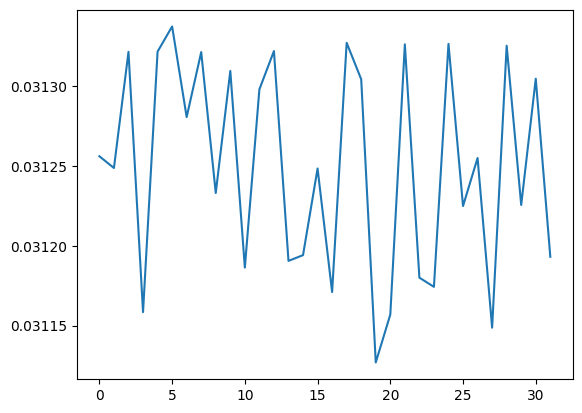

In [31]:
# caclulate normalized daily returns 
df_returns = normalized_returns(df)
# initialize random weights
w0 = weight_creator(df_returns)

# minimize cost function or objective function
res = minimize(obj_fun, 
               w0, 
               method='trust-constr',
               constraints=[linear_constraint],
               options={'verbose': 1},
               bounds=bounds)

plt.plot(res.x)

In [32]:
# use optimized weights
weights = res.x
# calc portfolio´s sharp ratio
portfolio_return = portfolio_returns(df_returns, weights)
portfolio_stdev = portfolio_std(df_returns, weights) 
portfolio_sr = portfolio_sharp_ratio(portfolio_return, portfolio_stdev, rfr=0.02)
print('portfolios sharp ratio: {}'.format(portfolio_sr*100))

portfolios sharp ratio: 0.07719209278957842


(array([  5.,  20.,  81., 209., 274., 231., 127.,  45.,   6.,   2.]),
 array([0.01538211, 0.02837288, 0.04136364, 0.0543544 , 0.06734516,
        0.08033593, 0.09332669, 0.10631745, 0.11930821, 0.13229898,
        0.14528974]),
 <BarContainer object of 10 artists>)

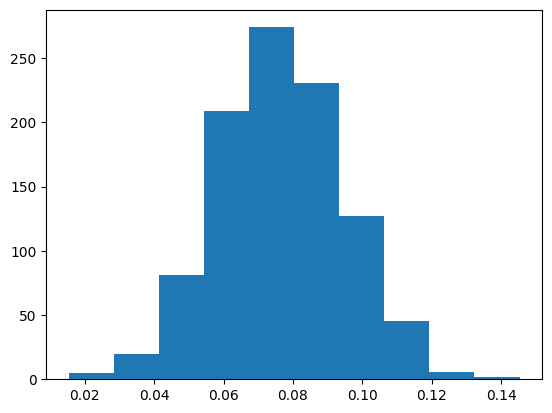

In [33]:
# compare with simulated distribution
plt.hist(df_simulation['portfolio sharp ratio']*100) 

# Optimize Portfolio Using Genetic Algorithm

In [34]:
from geneticalgorithm import geneticalgorithm as ga

In [35]:
# define parameters
algorithm_param = {'max_num_iteration': 100,\
                   'population_size':100,\
                   'mutation_probability':0.1,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':20}

In [41]:
# define variable bounds
lbs = np.repeat(0.0, len(stock_names))
ubs = np.repeat(1.0, len(stock_names))
varbound = np.array([[lbs[n], ubs[n]] for n in range(len(stock_names))])

# define variable type
vartype=np.repeat('real', len(stock_names))

In [42]:
# define objective function
def f(x):
    # define penalty
    penalty = (np.sum(x) - 1)**2        
    #calc portfolio´s sharp ratio
    rfr=0.02 # set risk free rate
    portfolio_return = portfolio_returns(df_returns, x)
    portfolio_stdev = portfolio_std(df_returns, x) 
    portfolio_sr = portfolio_sharp_ratio(portfolio_return, portfolio_stdev, rfr)
    return -portfolio_sr + penalty

In [43]:
model = ga( function = f,
            dimension = len(stock_names), # one variable for each stock weight
            variable_type_mixed = vartype,
            variable_boundaries = varbound,
            algorithm_parameters = algorithm_param)

 The best solution found:                                                                           
 [0.25050522 0.14701854 0.10428839 0.16824611 0.105281   0.0744502
 0.08068628 0.16163245 0.01241753 0.13353444 0.10039729 0.34566953
 0.16600726 0.05879041 0.14265282 0.13281064 0.10776593 0.04604256
 0.07700548 0.11114898 0.15940699 0.09748962 0.12821552 0.2222598
 0.09533184 0.0210239  0.13678955 0.10543418 0.54526532 0.13352619
 0.08633521 0.26064899]

 Objective function:
 12.375168217818086


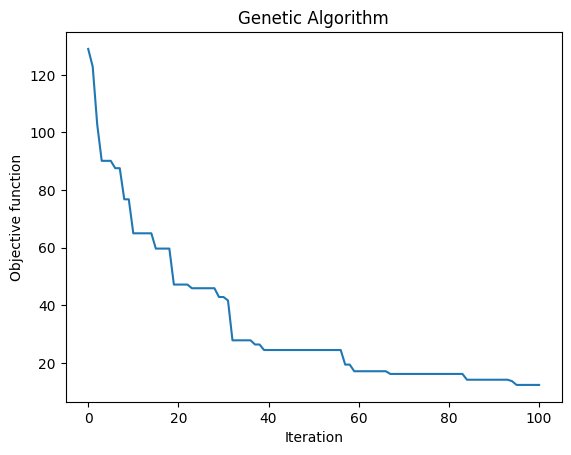

In [44]:
model.run()